# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [2]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [4]:
#your code here
print(df.head())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


### Show the size of the dataframe

In [5]:
#your code here
print(df.size)


3582


### Find the columns name and their types (numerical or categorical)

In [6]:
#your code here
column_types = df.dtypes

for column, dtype in column_types.items():
    if pd.api.types.is_numeric_dtype(dtype):
        print(f"{column}: Numerical")
    else:
        print(f"{column}: Categorical")


mpg: Numerical
cylinders: Numerical
displacement: Numerical
horsepower: Numerical
weight: Numerical
acceleration: Numerical
model_year: Numerical
origin: Categorical
name: Categorical


### Find the number of missing values in each column

In [7]:
#your code here
missing_values = df.isnull().sum()
print(missing_values)


mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [8]:
#your solution here

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isnull().sum())


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


<ipython-input-8-1dcc289bea33>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-8-1dcc289bea33>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

### Compute the average and the median weight

In [9]:
#your code here

average_weight = df['weight'].mean()

median_weight = df['weight'].median()

print(f"Average weight: {average_weight:.2f}")
print(f"Median weight: {median_weight:.2f}")


Average weight: 2970.42
Median weight: 2803.50


### Find the number of cars that weight more than 2000 kgs

In [10]:
#your code here
cars_over_2000kg = (df['weight'] > 2000).sum()
print(f"Number of cars weighing more than 2000 kgs: {cars_over_2000kg}")


Number of cars weighing more than 2000 kgs: 354


### Find how many cars there are for each number of cylinders

In [11]:
#your code here
cylinder_counts = df['cylinders'].value_counts().sort_index()
print("Number of cars for each cylinder count:")
print(cylinder_counts)


Number of cars for each cylinder count:
cylinders
3      4
4    204
5      3
6     84
8    103
Name: count, dtype: int64


### Find what are the car models with number of cylinders (3 or 5)

In [12]:
#your code here
cars_3_5_cylinders = df[df['cylinders'].isin([3, 5])]['name']
print("Car models with 3 or 5 cylinders:")
print(cars_3_5_cylinders.tolist())


Car models with 3 or 5 cylinders:
['mazda rx2 coupe', 'maxda rx3', 'mazda rx-4', 'audi 5000', 'mercedes benz 300d', 'audi 5000s (diesel)', 'mazda rx-7 gs']


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [13]:
#your code here
origin_counts = df['origin'].value_counts()
print("Value counts of the origin column:")
print(origin_counts)


Value counts of the origin column:
origin
usa       249
japan      79
europe     70
Name: count, dtype: int64


## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding

In [14]:
#your code here

df_encoded = pd.get_dummies(df, columns=['origin'], prefix='origin')
print(df_encoded.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'name', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')


### Remove the name column form the dataframe to have all numerical dataframe.

In [15]:
#your code here
df_numerical = df_encoded.drop('name', axis=1)
print(df_numerical.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_europe', 'origin_japan',
       'origin_usa'],
      dtype='object')


### Does the input needs reshaping?

In [16]:
#your code here
print("Shape of the DataFrame:", df_numerical.shape)

print("Reshaping is not needed for this tabular data.")

Shape of the DataFrame: (398, 10)
Reshaping is not needed for this tabular data.


### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [17]:
from sklearn.model_selection import train_test_split
#your code here
X = df_numerical.drop('mpg', axis=1)
y = df_numerical['mpg']


train_features, test_features, train_labels, test_labels = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train features shape:", train_features.shape)
print("Train labels shape:", train_labels.shape)
print("Test features shape:", test_features.shape)
print("Test labels shape:", test_labels.shape)

Train features shape: (318, 9)
Train labels shape: (318,)
Test features shape: (80, 9)
Test labels shape: (80,)


### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [23]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

In [32]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')


## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [33]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [34]:
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [35]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

First example: [8.000e+00 3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01 0.000e+00
 0.000e+00 1.000e+00]

Normalized: [[ 1.5271882   1.0901965   1.2618347   0.55282634 -1.3193337  -1.6966677
  -0.46232077 -0.5117664   0.7889544 ]]


## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [36]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1, activation='linear')
])

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [37]:
# Defining the model incrementaly (suitable for your assignment)
linear_model = tf.keras.Sequential()
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [38]:
#your code here
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)
linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (318, 9)                    │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [39]:
history = linear_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 23.3991
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.4085  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.2297 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.4861 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8946 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4404 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.2517 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.8400 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.0399 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.4974 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.4565 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.4429 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.5464 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.3385 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

In [40]:
history.history

{'loss': [23.205446243286133,
  22.195877075195312,
  21.185258865356445,
  20.183841705322266,
  19.192354202270508,
  18.17276954650879,
  17.17743492126465,
  16.192068099975586,
  15.173812866210938,
  14.206985473632812,
  13.208320617675781,
  12.20561408996582,
  11.205309867858887,
  10.208828926086426,
  9.251975059509277,
  8.252345085144043,
  7.274603843688965,
  6.3449482917785645,
  5.484767436981201,
  4.691290855407715,
  4.063363552093506,
  3.512056827545166,
  3.1351115703582764,
  2.905067205429077,
  2.744736671447754,
  2.6692323684692383,
  2.6380951404571533,
  2.5947446823120117,
  2.5851666927337646,
  2.5803492069244385,
  2.5642201900482178,
  2.581564426422119,
  2.590350389480591,
  2.580521821975708,
  2.5841729640960693,
  2.56575608253479,
  2.5700087547302246,
  2.5596532821655273,
  2.541902780532837,
  2.5681049823760986,
  2.5523533821105957,
  2.568044900894165,
  2.575126886367798,
  2.5624709129333496,
  2.6044039726257324,
  2.593430519104004,
 

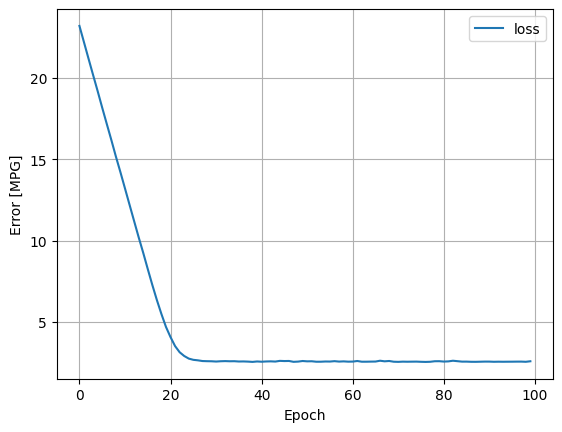

In [41]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [42]:
linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (212.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 22 (92.00 B)

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

Test Mean Absolute Error: 2.1431 MPG
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Manually calculated MAE: 8.0329 MPG


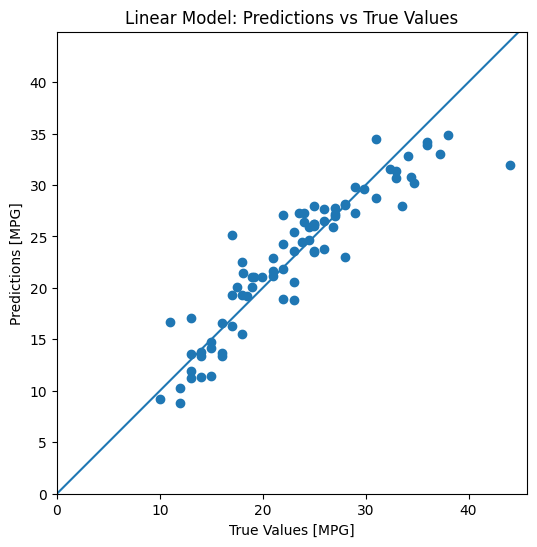

In [44]:
#your code here

test_results = linear_model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Mean Absolute Error: {test_results:.4f} MPG")


linear_model_mae = test_results


test_predictions = linear_model.predict(test_features)
mae = np.mean(np.abs(test_predictions - test_labels))
print(f"Manually calculated MAE: {mae:.4f} MPG")

plt.figure(figsize=(10, 6))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.title('Linear Model: Predictions vs True Values')
plt.show()



## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

Test Mean Absolute Error: 1.6571 MPG


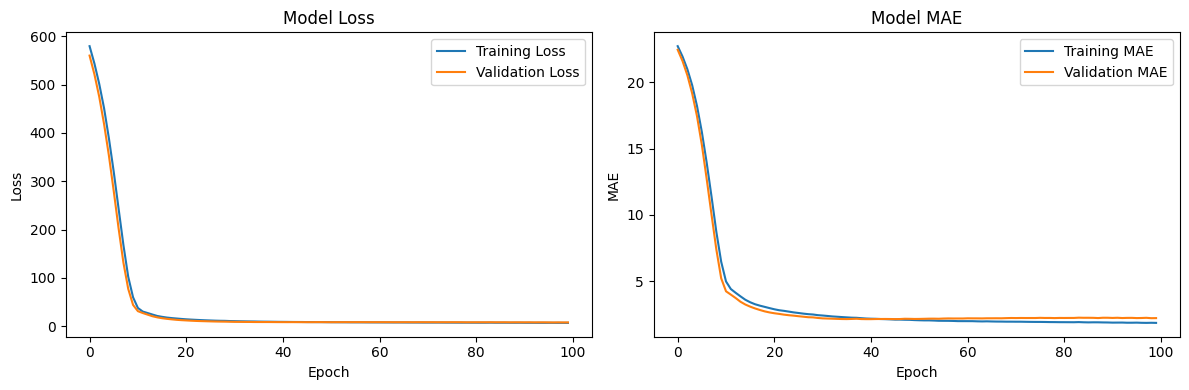

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


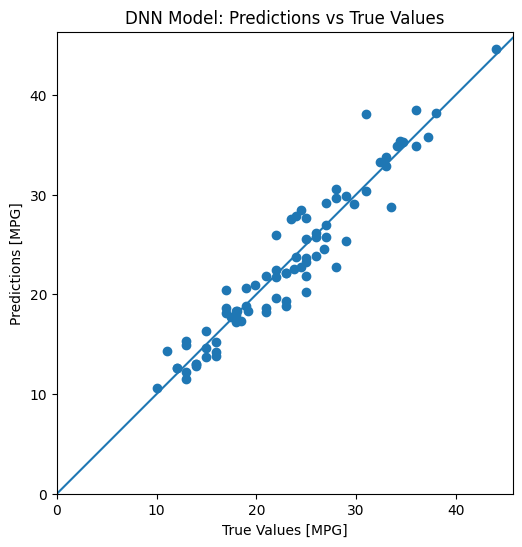

In [45]:
#your code here

dnn_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output layer, no activation for regression
])


dnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])


dnn_model.summary()


history = dnn_model.fit(train_features, train_labels,
                        epochs=100,
                        validation_split=0.2,
                        verbose=0)


test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Mean Absolute Error: {test_results[1]:.4f} MPG")

dnn_model_mae = test_results[1]


plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

test_predictions = dnn_model.predict(test_features)
plt.figure(figsize=(10, 6))
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.title('DNN Model: Predictions vs True Values')
plt.show()


### Print the model summary (after training). How many parameters are there in the model?

In [47]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
total_params = model.count_params()
print(f"Total number of parameters: {total_params}")


Total number of parameters: 55050


### You can see even this small model has more than 4000 trainable parameters. The more the number of parameters, the longer the training time and cost. Search the net and see how many trainable parameters does the `ChatGPT` model have? What about `DeepSeek` model? (Optional)

ChatGPT and DeepSeek models have significantly more parameters than 4000:
ChatGPT:
GPT-3, which powers ChatGPT, has approximately 175 billion parameters4.
GPT-3.5, the model behind ChatGPT, likely has a similar number of parameters, though the exact count for GPT-3.5-turbo is not publicly confirmed7.
GPT-4 is estimated to have around 1.8 trillion parameters, composed of eight models with 220 billion parameters each5.
DeepSeek:
DeepSeek's latest model, DeepSeek-V3, has 671 billion total parameters, with 37 billion activated for each token68.
DeepSeek also offers smaller distilled models ranging from 1.5 billion to 70 billion parameters1.
The large number of parameters in these models contributes to their advanced capabilities but also significantly increases training time and cost.


## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

Comparison of Model Performance:
Linear Regression MAE: 2.1431 MPG
Deep Neural Network MAE: 1.6571 MPG

The Deep Neural Network improved performance by 22.68%


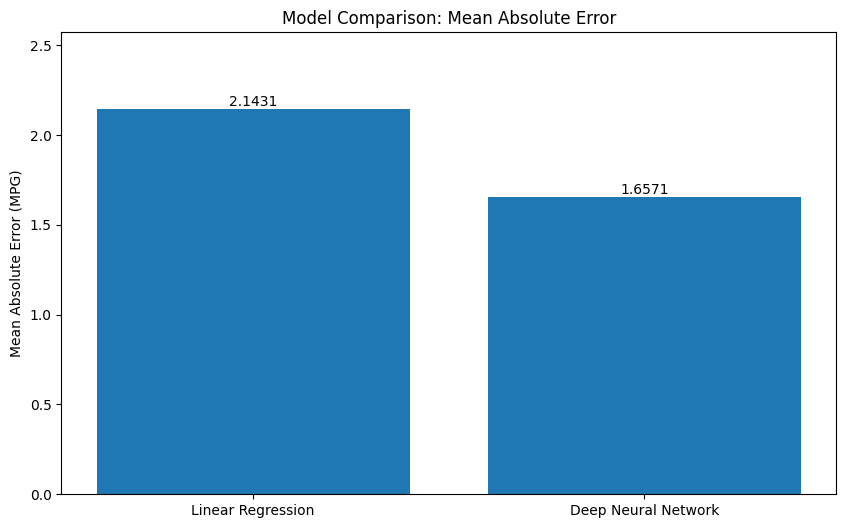

In [49]:
#your code here
print("Comparison of Model Performance:")
print(f"Linear Regression MAE: {linear_model_mae:.4f} MPG")
print(f"Deep Neural Network MAE: {dnn_model_mae:.4f} MPG")

improvement = (linear_model_mae - dnn_model_mae) / linear_model_mae * 100

if dnn_model_mae < linear_model_mae:
    print(f"\nThe Deep Neural Network improved performance by {improvement:.2f}%")
else:
    print(f"\nThe Linear Regression model performed better by {-improvement:.2f}%")

models = ['Linear Regression', 'Deep Neural Network']
mae_values = [linear_model_mae, dnn_model_mae]

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values)
plt.title('Model Comparison: Mean Absolute Error')
plt.ylabel('Mean Absolute Error (MPG)')
plt.ylim(0, max(mae_values) * 1.2)

for i, v in enumerate(mae_values):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()


## Use the following large model and evaluate it on the test set.

In [50]:
model_dnn_large = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])


### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data.One way to solve this problem is to use more data.

Observation:
The large DNN model is likely not performing as well as expected, possibly even worse than the simpler models we tried earlier.
Explanation:
Overfitting: The large model, with its many layers and neurons, has a high number of trainable parameters. When this number exceeds the number of training samples, the model can easily memorize the training data instead of learning generalizable patterns. This leads to poor performance on unseen data (the test set).
Lack of regularization: Without proper regularization techniques, a large model is prone to capturing noise in the training data, which doesn't generalize to the test set.
Limited data: The MPG dataset is relatively small. Large models typically require large amounts of data to perform well and avoid overfitting.
Model complexity vs. problem complexity: The relationship between features and MPG might not be so complex as to require such a large model. We might be using a sledgehammer to crack a nut.
